In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'y')

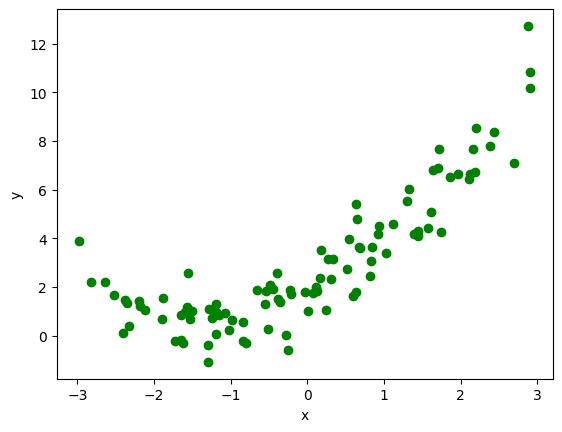

In [7]:
##added outliers and creating data
x=6*np.random.rand(100,1)-3
y=0.5*x**2+1.5*x+2+np.random.randn(100,1)
plt.scatter(x,y,color='g')
plt.xlabel('x')
plt.ylabel('y')

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
## implement SLR
from sklearn.linear_model import LinearRegression
regression_1=LinearRegression()

In [10]:
regression_1.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
from sklearn.metrics import r2_score
score = r2_score(y_test,regression_1.predict(x_test))
print(score)

0.7698341555793027


Text(0, 0.5, 'Y Dataset')

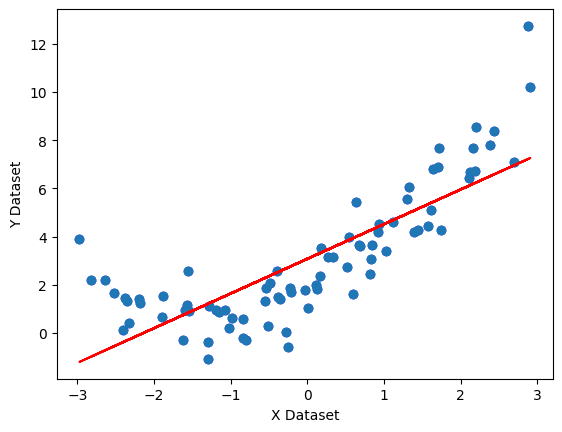

In [14]:
## Visualise it 
plt.plot(x_train,regression_1.predict(x_train),color='r')
plt.scatter(x_train,y_train, color='b')
plt.scatter(x_train,y_train)
plt.xlabel("X Dataset")
plt.ylabel("Y Dataset")

In [15]:
## lets increase deg (keep on increasing until good result in general case)
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2,include_bias=True)##including intercept wali chij
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.transform(x_test)


In [16]:
from sklearn.metrics import r2_score
regression=LinearRegression()
regression.fit(x_train_poly,y_train)
y_pred=regression.predict(x_test_poly)
score=r2_score(y_test,y_pred)
print(score)

0.9254117259362487


In [ ]:
print(regression.coef_)
print(regression.intercept_)

[[0.         1.46633273 0.53342016]]


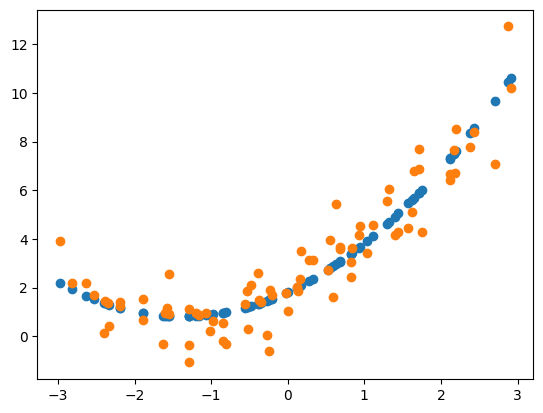

In [19]:
plt.scatter(x_train,regression.predict(x_train_poly))
plt.scatter(x_train,y_train)

In [20]:
##lets make deg 3
poly=PolynomialFeatures(degree=3,include_bias=True)##including intercept wali chij
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.transform(x_test)

In [ ]:
from sklearn.metrics import r2_score
regression=LinearRegression()
regression.fit(x_train_poly,y_train)
y_pred=regression.predict(x_test_poly)
score=r2_score(y_test,y_pred)
print(score)
##its reducing a bit not a lot of differece

0.9191097758311167


In [22]:
## Prediction of new data 
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly=poly.transform(X_new)
X_new_poly ##4 features


array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00,
        -2.61940839e+01],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00,
        -2.54043665e+01],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00,
        -2.46306834e+01],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00,
        -2.38728702e+01],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00,
        -2.31307624e+01],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00,
        -2.24041955e+01],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00,
        -2.16930052e+01],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00,
        -2.09970269e+01],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00,
        -2.03160961e+01],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00,
        -1.96500486e+01],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00,
      

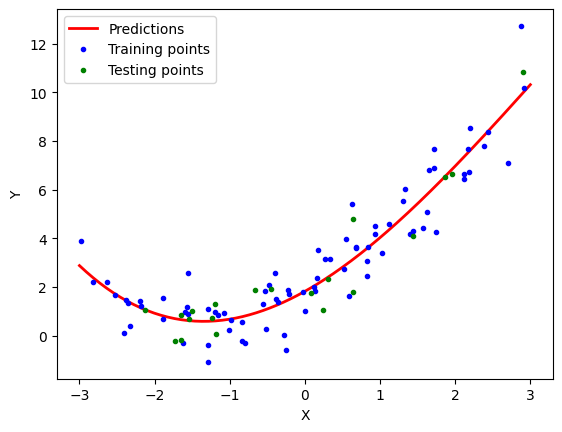

In [23]:
y_new = regression.predict(X_new_poly)
plt.plot(X_new,y_new,"r-",linewidth=2,label="Predictions")
plt.plot(x_train,y_train,"b.",label="Training points")
plt.plot(x_test,y_test,"g.",label="Testing points")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

## Pipeline Concept

In [24]:
from sklearn.pipeline import Pipeline

In [ ]:
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    # We are basically makeing polynomial features to apply linear regressiion on so that it works as polynomial regression 
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(x_train,y_train) ## ploynomial and fit of linear reression
    y_pred_new=poly_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new, y_pred_new,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(x_train, y_train, "b.", linewidth=3)
    plt.plot(x_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4, 0, 10])
    plt.show()
    

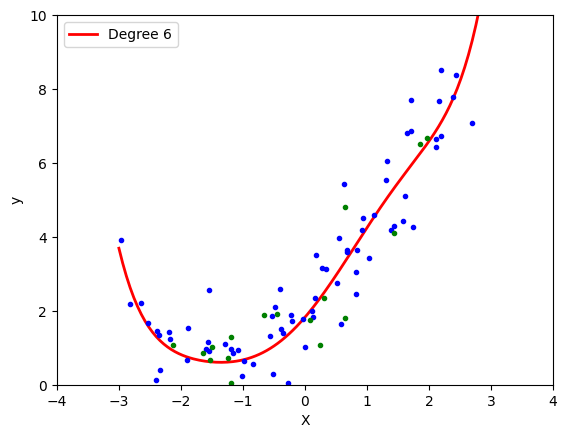

In [31]:
poly_regression(6)